### <font color='Green'> Classification Task

Approach:
- Combined train and test files
- Explore data (correlation, distribution)
- Determine important features
- Model building
- Validation with the hold-out set 
- Select best performed models

EDA :
- Nearly all the columns contain missing values
- The values were normally distributed in all the numerics columns. Filled the missing values with the median in each column.
- Mapped x34, x35, x68, x93 and removed the special characters in x41, x45.
- Performed t-test on x35 to make sure names like fri and fridays, thu and thruday should not be combined.  
- Filled the missing values with the most frequent value in x34, x35, x68, and x93. 
- Checked the distribution of x41 and x45 before filling NAs with their mean



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
tr = pd.read_csv('../train.csv')
te = pd.read_csv('../test.csv')
print(tr.shape)
print(te.shape)

(40000, 101)
(10000, 100)


In [3]:
#### Combine test and train to fill NAs

In [4]:
# add idx and y to te and concatenate two sets
te['y'] = 'NAN'
df = pd.concat([tr,te], axis=0)
df['idx'] = range(50000)       # index
df.shape

(50000, 102)

In [5]:
df.shape # 1000 samples contain NA

(50000, 102)

In [6]:
# Devide column types
a = list(df)
flo_vars = list(df.select_dtypes(include=[np.float64]))
int_vars = list(df.select_dtypes(include=[np.int64]))
ch_vars  = list(set(a) - set(flo_vars)-set(int_vars))
print(len(flo_vars))
print(int_vars)
print(ch_vars)

94
[]
['x34', 'x45', 'x68', 'idx', 'x93', 'y', 'x41', 'x35']


In [7]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,idx
count,49986.000000,49988.000000,49991.000000,49987.000000,49992.000000,49989.000000,49989.000000,49987.000000,49993.000000,49991.000000,...,49992.000000,49995.000000,49992.000000,49988.000000,49991.000000,49983.000000,49987.000000,49993.000000,49985.000000,50000.000000
mean,22.927160,-0.058769,1.544536,-0.818440,0.313804,-0.863370,0.000880,-0.028259,-7.872697,-0.058154,...,-13.823563,0.004953,0.018006,-0.036068,-0.027905,-0.475170,-1.058265,0.005524,0.339263,24999.500000
std,107.964201,0.277365,36.494334,16.739482,40.990525,21.215947,0.742564,6.636588,35.449144,6.264077,...,152.802095,5.002489,6.467357,5.641379,32.334714,13.253572,7.663491,1.018896,8.560024,14433.901067
min,-413.886484,-1.177868,-155.506382,-72.148195,-154.979397,-85.536249,-2.882761,-25.483865,-145.002565,-24.544850,...,-668.827480,-19.361109,-28.136665,-24.462180,-147.149165,-60.310880,-30.759058,-4.264671,-35.844332,0.000000
25%,-50.389741,-0.245268,-22.986384,-12.152856,-27.373758,-15.247394,-0.502224,-4.502088,-31.598887,-4.275431,...,-115.232339,-3.371696,-4.353463,-3.872615,-21.705466,-9.353427,-6.222115,-0.681082,-5.467210,12499.750000
50%,23.112587,-0.060838,1.854966,-0.765840,0.357183,-0.834150,0.001813,-0.001634,-7.943740,-0.102832,...,-10.869701,-0.027675,0.019322,-0.014270,0.171275,-0.370608,-1.059015,0.005305,0.326318,24999.500000
75%,94.816592,0.125545,26.178933,10.523932,27.929486,13.505281,0.497452,4.437034,15.799707,4.147878,...,89.794252,3.379045,4.373027,3.769867,21.908402,8.471867,4.070072,0.692332,6.139033,37499.250000
max,499.670953,1.148882,146.662970,66.652223,174.290057,86.373854,3.704431,32.662041,180.625693,24.063544,...,599.273329,22.648086,27.252550,23.787097,134.227175,54.964038,32.236033,4.114639,36.351247,49999.000000


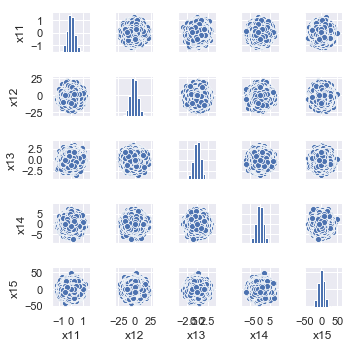

In [8]:
# Visualize of some numeric variables
sns.set()
sns.pairplot(df[['x11', 'x12', 'x13', 'x14', 'x15']].dropna(),height = 1 ,kind ='scatter')
plt.show()

In [9]:
# fill NA with median (float vars)
for i in flo_vars:
    df[flo_vars] = df[flo_vars].fillna(df[flo_vars].median(), inplace = False)    

In [10]:
# Map character 
df['x93'] = df['x93'].map({'america':0, 'asia':1, 'euorpe':2})
df['x68'] = df['x68'].map({'January':1, 'Feb': 2, 'Mar':3 ,'Apr':4, 'May': 5, 'Jun':6, 'July':7, 'Aug': 8, 'sept.':9,
                              'Oct':10, 'Nov': 11, 'Dev':12})
df['x35'] = df['x35'].map({'monday':1, 'tuesday': 2, 'wed':3 ,'wednesday':31, 'thur':4, 'thurday': 41, 'friday':51, 'fri':5})
df['x34'] = df['x34'].map({'Honda':1, 'Toyota': 2, 'bmw':3 ,'chevrolet':4, 'chrystler': 5, 'ford':6, 'mercades':7, 'nissan': 8,
                             'tesla':9,'volkswagon':10})

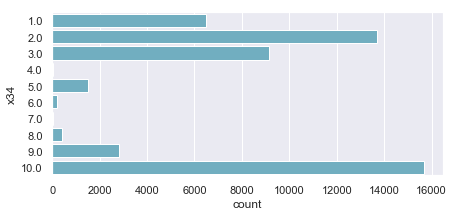

In [11]:
# Car type 
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="x34", data=df, color="c")

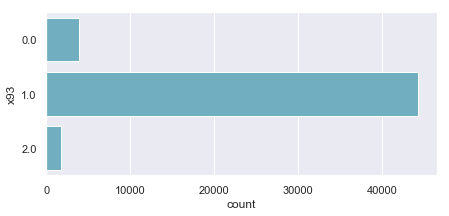

In [12]:
# Continent 
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="x93", data=df, color="c")

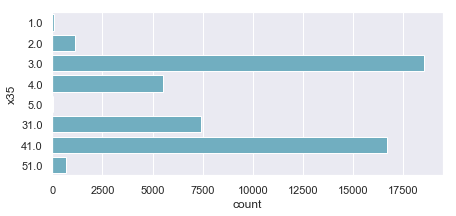

In [13]:
# weekday 
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="x35", data=df, color="c")

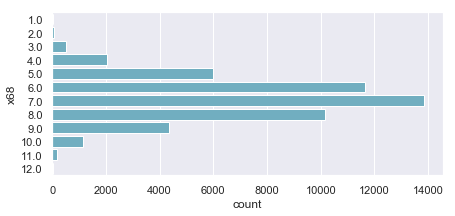

In [14]:
# Month 
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="x68", data=df, color="c")

In [15]:
# Fill NA with the most frequent value ('mean' based on the distribution) 
df['x34'] = df['x34'].fillna(df['x34'].mean(), inplace = False)
df['x35'] = df['x35'].fillna(df['x35'].mean(), inplace = False)
df['x68'] = df['x68'].fillna(df['x68'].mean(), inplace = False)
df['x93'] = df['x93'].fillna(df['x93'].mean(), inplace = False)

##### Need to make sure 3,31 5, 51, and 4, 41 are not the same !

In [16]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

# Create sample data.
a = df[flo_vars][df['x35'] == 3] 
b = df[flo_vars][df['x35'] == 31] 
c = df[flo_vars][df['x35'] == 4] 
d = df[flo_vars][df['x35'] == 41] 
e = df[flo_vars][df['x35'] == 5] 
f = df[flo_vars][df['x35'] == 51]

# Use scipy.stats.ttest_ind.
p1 = ttest_ind(a, b, equal_var=False)
p2 = ttest_ind(c, d, equal_var=False)
p3 = ttest_ind(e, f, equal_var=False)
#print("ttest_ind: t = %g  p = %g" % (t, p))

print('Differences in 3 vs 31 :',np.bincount(sum(p1) >0.05)[0]) # (False, True)
print('Differences in 4 vs 41 :',np.bincount(sum(p2) >0.05)[0])
print('Differences in 5 vs 51 :',np.bincount(sum(p3) >0.05)[0])

Differences in 3 vs 31 : 38
Differences in 4 vs 41 : 34
Differences in 5 vs 51 : 28


Around 35% of columns show a significant differece between 'wed' &'wednesday', 'thur' &'thurday','friday'&'fri'
Therefore, decide not to merge them

In [17]:
# check NAs
df[ch_vars][df[ch_vars].isnull().any(1)]

,x34,x45,x68,idx,x93,y,x41,x35
3272,2.0,NaN,5.0,3272,1.0,0,$364.18,4.0
7268,10.0,NaN,5.0,7268,1.0,0,$1085.49,3.0
10886,10.0,NaN,6.0,10886,1.0,1,$-660.57,3.0
13811,2.0,NaN,6.0,13811,1.0,0,$-849.58,41.0
22440,10.0,-0.01%,6.0,22440,1.0,0,NaN,41.0
24478,1.0,-0.02%,7.0,24478,1.0,0,NaN,41.0
25032,2.0,-0.01%,7.0,25032,1.0,0,NaN,3.0
26557,10.0,0.02%,4.0,26557,1.0,1,NaN,4.0
26630,3.0,-0.01%,9.0,26630,1.0,0,NaN,41.0
29896,10.0,-0.0%,8.0,29896,1.0,0,NaN,3.0


In [18]:
# remove special char
df['x41'] = df['x41'].map(lambda x: str(x)[1:])
df['x45'] = df['x45'].map(lambda x: str(x)[:-1])

In [19]:
# make sure ther is no char in x41 and x45

a = pd.to_numeric(df.x41, errors='coerce')
iddx = a.isna()
df[iddx].x45

22440    -0.01
24478    -0.02
25032    -0.01
26557     0.02
26630    -0.01
29896     -0.0
Name: x45, dtype: object

In [20]:
df['x41'] = df['x41'].replace('an', np.NaN, inplace = False)
df['x45'] = df['x45'].replace('na', np.NaN, inplace = False)

In [21]:
df['x41'] = df['x41'].astype(np.float64)
df['x45'] = df['x45'].astype(np.float64)
df['x41'].max()

4327.53

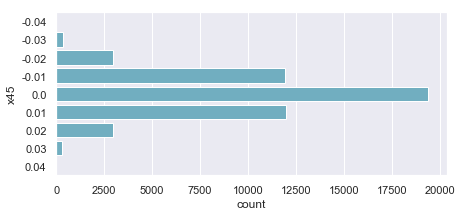

In [22]:
# x45 summary  
f, ax = plt.subplots(figsize=(7, 3))
x = df['x45'][~np.isnan(df['x45'])]
sns.countplot(y= x, data=df, color="c")

C:\Users\clfee\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


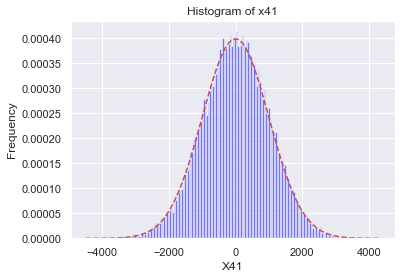

In [23]:
# Normal distribution of x41

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# example data
mu = df['x41'].mean() # mean of distribution
sigma = df['x41'].std() # standard deviation of distribution
x = df['x41'][~np.isnan(df['x41'])]


num_bins = 200
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('X41')
plt.ylabel('Frequency')
plt.title(r'Histogram of x41')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [24]:
df['x45']=  df['x45'].fillna(df['x45'].mean(), inplace = False)
df['x41'] = df['x41'].fillna(df['x41'].mean(), inplace = False)

df[ch_vars].head(5)

,x34,x45,x68,idx,x93,y,x41,x35
0,1.0,0.00,7.0,0,1.0,0,229.47,3.0
1,1.0,-0.00,6.0,1,1.0,0,213.90,31.0
2,10.0,-0.02,8.0,2,1.0,0,2207.13,41.0
3,10.0,-0.00,7.0,3,1.0,0,82.09,41.0
4,6.0,0.01,7.0,4,1.0,0,273.61,41.0


#### Data Checkpoint

In [25]:
# check NAs
df[df.isnull().any(1)]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x92,x93,x94,x95,x96,x97,x98,x99,y,idx


In [26]:
# make sure data type is OK
# df contained 6 objects
df.info()
print(list(df.select_dtypes(include=[np.object])))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Columns: 102 entries, x0 to idx
dtypes: float64(100), int32(1), object(1)
memory usage: 40.4+ MB
['y']


## Determine important features 

In [34]:
# split hold-out 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

seed = 15678

X = df.iloc[0:40000,].drop(['y','idx'], axis=1)
y = df.iloc[0:40000,].y.astype(np.int64)

X_t_org, X_hold_org, y_t, val_y = train_test_split(X, y, stratify = y, random_state = seed , test_size = 0.1)

#### After running Random Forest and eli5, several important features were determined. 
Feature engineering :                                                                                
-    new varaibales were created by adding top features.                                                                       

Significant score improving  :
-    The scores were improved with the new variables comparing runs using all the variables.

In [35]:
# Run only after permutation importance and feature importance are determined
# split validation , train and test after determing important features 

seed = 15678

df['new'] = (df.x75 + df.x37)
df['new2'] = (df.x58 + df.x97)

X = df.iloc[0:40000,].drop(['y','idx'], axis=1)
y = df.iloc[0:40000,].y.astype(np.int64)



a =['x75', 'x37', 'x58', 'x97', 'x41', 'x99', 'x56', 'x66','x63','x53', 'x1', 'x3','x70','x83','x21','x22','x51','x5','x12','x10',
    'x44','x78','x72', 'x73', 'x43','x96','new','new2','x50', 'x33','x2','x0','x77', 'x69','x57','x19']

X = X[a]

X_t_org, X_hold_org, y_t, val_y = train_test_split(X, y, stratify = y, random_state = seed , test_size = 0.1)

In [36]:
# Split train, test

scaler = MinMaxScaler()
X_train_org, X_test_org, y_trainS, y_testS = train_test_split(X_t_org, y_t, random_state = seed , test_size = 0.2)

X_trainS = scaler.fit_transform(X_train_org)
X_testS  = scaler.transform(X_test_org)

In [37]:
# Examine Models with the validation set
X_tr_org, X_te_org, y_train, y_test = train_test_split(X_t_org, y_t, random_state = seed , test_size = 0.2)

X_train = scaler.fit_transform(X_tr_org)
X_test = scaler.fit_transform(X_te_org)
val_X   = scaler.transform(X_hold_org)

In [38]:
y_train.shape

(28800,)

In [39]:
X_train.shape

(28800, 36)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_values =  {'max_depth'  : [15,20],
              'n_estimators': [190,200] }

rnd_clf = RandomForestClassifier(random_state = seed)
grid_rnd = GridSearchCV(rnd_clf, cv = 3, param_grid = grid_values)
grid_rnd.fit(X_trainS, y_trainS)

print('Grid best parameter Random Forest (max. accuracy): ', grid_rnd.best_params_)
print('Grid best score Random Forest (accuracy): ', grid_rnd.best_score_)

Grid best parameter Random Forest (max. accuracy):  {'max_depth': 20, 'n_estimators': 190}
Grid best score Random Forest (accuracy):  0.8998958333333333


In [42]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_trainS, y_trainS)

pred_most_frequent = dummy_majority.predict(X_testS)

# Apply best parameters

grnd = RandomForestClassifier(**grid_rnd.best_params_, random_state=42)
grnd.fit(X_trainS, y_trainS)
y_pred = grnd.predict(X_testS)

# Apply to val 
val_y_pred = grnd.predict(val_X)
   

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Dummy Test score: {:.2f}".format(dummy_majority.score(X_testS, y_testS)))

from sklearn.metrics import classification_report

print(classification_report(y_testS, pred_most_frequent, target_names=["0", "1"]))
print('Random Forest:',classification_report(y_testS, y_pred, target_names=["0", "1"]))

# full: 0.89
# 0.89 with new and new2

Unique predicted labels: [0]
Dummy Test score: 0.79
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      5713
          1       0.00      0.00      0.00      1487

avg / total       0.63      0.79      0.70      7200

Random Forest:              precision    recall  f1-score   support

          0       0.90      1.00      0.94      5713
          1       0.97      0.57      0.71      1487

avg / total       0.91      0.91      0.90      7200



C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_testS,y_pred)

print(auc)

0.7805961368207645


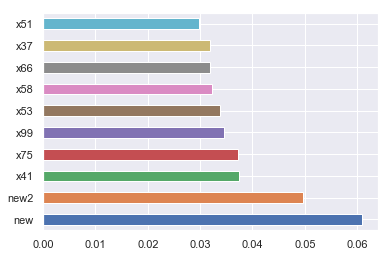

In [44]:
# Plotting feature importance
%matplotlib inline
feat_importances = pd.Series(grnd.feature_importances_, index=list(X))
feat_importances.nlargest(10).plot(kind='barh')

In [45]:
# Using permutation importance to determine wich features are important, and see if we can lower the MSE

import eli5
from eli5.sklearn import PermutationImportance

var = a

perm = PermutationImportance(grnd, random_state=seed).fit(X_testS, y_testS)
eli5.show_weights(perm, feature_names = var)


Weight,Feature
0.0289 ± 0.0029,new
0.0211 ± 0.0021,new2
0.0137 ± 0.0023,x99
0.0128 ± 0.0013,x75
0.0099 ± 0.0029,x53
0.0096 ± 0.0011,x58
0.0095 ± 0.0015,x37
0.0090 ± 0.0021,x41
0.0083 ± 0.0010,x51
0.0081 ± 0.0025,x1


## Model Building ##

#### Soft Voting

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Decision Tree parameters are adapted from previou result  

grid_no = {'n_neighbors'  : [6, 7, 8]}
grid_values = {'max_depth'  : [ 10, 20, 30],
              'n_estimators': [ 180, 190, 200]}
grid_para = {'C'  : [ 1, 3, 5 ],
             'gamma'  : [ 1, 2]}

knn_clf = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_clf, cv = 3, param_grid = grid_no)

rnd_clf = RandomForestClassifier(random_state = seed)
grid_rnd = GridSearchCV(rnd_clf, cv = 3, param_grid = grid_values)

#svm_clf = SVC(probability = True)
svm_clf = SVC(kernel = 'rbf', probability = True)
grid_svm = GridSearchCV(svm_clf, cv = 3, param_grid = grid_para)

grid_knn.fit(X_train, y_train)
grid_rnd.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)

print('Grid best parameter KNN (max. accuracy): ', grid_knn.best_params_)
print('Grid best score KNN (accuracy): ', grid_knn.best_score_)

print('Grid best parameter Random Forest (max. accuracy): ', grid_rnd.best_params_)
print('Grid best score Random Forest (accuracy): ', grid_rnd.best_score_)

print('Grid best parameter SVM (max. accuracy): ', grid_svm.best_params_)
print('Grid best score SVM (accuracy): ', grid_svm.best_score_)

Grid best parameter KNN (max. accuracy):  {'n_neighbors': 7}
Grid best score KNN (accuracy):  0.9562847222222223
Grid best parameter Random Forest (max. accuracy):  {'max_depth': 20, 'n_estimators': 190}
Grid best score Random Forest (accuracy):  0.8998958333333333
Grid best parameter SVM (max. accuracy):  {'C': 3, 'gamma': 2}
Grid best score SVM (accuracy):  0.9799305555555555


In [58]:
from sklearn.ensemble import VotingClassifier

# Apply best parameters

gknn = KNeighborsClassifier(**grid_knn.best_params_)
gknn.fit(X_train, y_train)
grnd = RandomForestClassifier(**grid_rnd.best_params_, random_state=42)
grnd.fit(X_train, y_train)
gsvc = SVC(**grid_svm.best_params_, random_state=42, probability = True)
gsvc.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('rnd', grnd), ('svc', gsvc),('knn', gknn)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (gknn,gsvc, grnd, voting_clf):
    clf.fit(X_train, y_train)
    sy_pred = clf.predict(X_test)
    val_y_pred = clf.predict(val_X)
    print(clf.__class__.__name__, accuracy_score(y_test, sy_pred))

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Dummy Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["0", "1"]))
print('Soft Voting:',classification_report(y_test, sy_pred, target_names=["0", "1"]))

KNeighborsClassifier 0.9458333333333333
SVC 0.9791666666666666
RandomForestClassifier 0.8784722222222222


C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


VotingClassifier 0.9622222222222222
Unique predicted labels: [0]
Dummy Test score: 0.79
             precision    recall  f1-score   support

          0       0.79      1.00      0.88      5713
          1       0.00      0.00      0.00      1487

avg / total       0.63      0.79      0.70      7200

Soft Voting:              precision    recall  f1-score   support

          0       0.96      1.00      0.98      5713
          1       0.99      0.83      0.90      1487

avg / total       0.96      0.96      0.96      7200



C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\clfee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,sy_pred)

print(auc)

0.9117741471656273


In [60]:
# Validation AUC # 

from sklearn.metrics import roc_auc_score

val_auc = roc_auc_score(val_y,val_y_pred)

print(val_auc)

0.9143787049407733


In [61]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, sy_pred)

array([[5700,   13],
       [ 259, 1228]], dtype=int64)

In [62]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y,val_y_pred)

array([[3181,   10],
       [ 136,  673]], dtype=int64)

#### Neural Network  

In [63]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras.wrappers.scikit_learn import KerasClassifier

In [64]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8))
#model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=1000,validation_split = 0.1,verbose = 1)

Train on 25920 samples, validate on 2880 samples
Epoch 1/100
25920/25920 [==============================] - 3s 125us/step - loss: 0.6998 - acc: 0.6335 - val_loss: 0.6691 - val_acc: 0.8062
Epoch 2/100
25920/25920 [==============================] - 1s 51us/step - loss: 0.6417 - acc: 0.7616 - val_loss: 0.5909 - val_acc: 0.8062
Epoch 3/100
25920/25920 [==============================] - 1s 51us/step - loss: 0.5940 - acc: 0.7835 - val_loss: 0.5566 - val_acc: 0.8062
Epoch 4/100
25920/25920 [==============================] - 1s 53us/step - loss: 0.5555 - acc: 0.7962 - val_loss: 0.5009 - val_acc: 0.8062
Epoch 5/100
25920/25920 [==============================] - 1s 54us/step - loss: 0.5041 - acc: 0.7975 - val_loss: 0.4259 - val_acc: 0.8062
Epoch 6/100
25920/25920 [==============================] - 1s 51us/step - loss: 0.4599 - acc: 0.7974 - val_loss: 0.3873 - val_acc: 0.8062
Epoch 7/100
25920/25920 [==============================] - 1s 52us/step - loss: 0.4402 - acc: 0.7976 - val_loss: 0.3909 - 

25920/25920 [==============================] - 2s 70us/step - loss: 0.1986 - acc: 0.9559 - val_loss: 0.1477 - val_acc: 0.9656
Epoch 60/100
25920/25920 [==============================] - 2s 63us/step - loss: 0.2043 - acc: 0.9556 - val_loss: 0.1548 - val_acc: 0.9646
Epoch 61/100
25920/25920 [==============================] - 1s 55us/step - loss: 0.1950 - acc: 0.9534 - val_loss: 0.1479 - val_acc: 0.9674
Epoch 62/100
25920/25920 [==============================] - 1s 57us/step - loss: 0.1965 - acc: 0.9537 - val_loss: 0.1544 - val_acc: 0.9642
Epoch 63/100
25920/25920 [==============================] - 1s 58us/step - loss: 0.1933 - acc: 0.9564 - val_loss: 0.1461 - val_acc: 0.9674
Epoch 64/100
25920/25920 [==============================] - 1s 56us/step - loss: 0.1925 - acc: 0.9557 - val_loss: 0.1449 - val_acc: 0.9601
Epoch 65/100
25920/25920 [==============================] - 2s 59us/step - loss: 0.1890 - acc: 0.9561 - val_loss: 0.1564 - val_acc: 0.9538
Epoch 66/100
25920/25920 [==============

In [71]:
from sklearn.metrics import classification_report

y_predict = model.predict(X_test)
tes_y_predict = model.predict(val_X)

a = []
for i in y_predict:
    if i >= 0.5:
        y_pred = 1
    else:
        y_pred = 0
    a.append(y_pred)
    
ny_pred = a

print('neural network:',classification_report(y_test, ny_pred, target_names=["0", "1"]))

###### validation

b = []
for i in tes_y_predict:
    if i >= 0.5:
        tes_y_predict = 1
    else:
        tes_y_predict = 0
    b.append(tes_y_predict)
    
nval_y_predict = b


neural network:              precision    recall  f1-score   support

          0       0.97      0.99      0.98      5713
          1       0.96      0.87      0.91      1487

avg / total       0.97      0.97      0.96      7200



In [66]:
# AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,ny_pred)

print(auc)


0.9301156142781756


In [72]:
# AUC validation ##
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(val_y,nval_y_predict)

print(auc)


0.9297863002364111


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y,nval_y_predict) 

array([[3161,   30],
       [ 106,  703]], dtype=int64)

## Prediction on Test set ##

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

seed = 15678

### FULL MODEL #####
tes = df.iloc[40000:50000,]
df = df.iloc[0:40000,]

df['y'] = df['y'].astype(np.int64)

df['new'] = (df.x75 + df.x37)
df['new2'] = (df.x58 + df.x97)

tes['new'] = (tes.x75 + tes.x37)
tes['new2'] = (tes.x58 + tes.x97)


a =['x75', 'x37', 'x58', 'x97', 'x41', 'x99', 'x56', 'x66','x63','x53', 'x1', 'x3','x70','x83','x21','x22','x51','x5','x12','x10',
    'x44','x78','x72', 'x73', 'x43','x96','new','new2','x50', 'x33','x2','x0','x77', 'x69','x57','x19']



X = df[a]
y = df.y

tes_X1 = tes[a]
tes_y = tes.y

# Split train, test
scaler = MinMaxScaler()
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = seed , test_size = 0.2)

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)
tes_X   = scaler.transform(tes_X1)

(40000, 104)

#### Soft Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

C = 3
gamma = 20 
n_neighbors  = 7
max_depth    = 20
n_estimators = 190
          
knn_clf = KNeighborsClassifier(n_neighbors)
rnd_clf = RandomForestClassifier(max_depth =max_depth, n_estimators=n_estimators  ,random_state = seed)
svm_clf = SVC(kernel = 'rbf', C= C, gamma = gamma,probability = True)

knn_clf.fit(X_train, y_train)
rnd_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('svc', svm_clf),('knn', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)
sy_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
for clf in (knn_clf,svm_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    sy_pred = clf.predict(X_test)
    softv_y_pred = clf.predict(tes_X)
    print(clf.__class__.__name__, accuracy_score(y_test, sy_pred))


from sklearn.metrics import classification_report

print('Soft Voting:',classification_report(y_test, sy_pred, target_names=["0", "1"]))

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,sy_pred)

print(auc)

In [ ]:
softv_pred = pd.DataFrame(softv_y_pred)
softv_pred.to_csv("results1.csv")

#### Neural Network

In [ ]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8))
#model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=1000,validation_split = 0.1,verbose = 1)

In [ ]:
from sklearn.metrics import classification_report

y_predict = model.predict(X_test)
tes_y_predict = model.predict(tes_X)

a = []
for i in y_predict:
    if i >= 0.5:
        y_pred = 1
    else:
        y_pred = 0
    a.append(y_pred)
    
ny_pred = a

print('neural network:',classification_report(y_test, ny_pred, target_names=["0", "1"]))

###### Test #####

b = []
for i in tes_y_predict:
    if i >= 0.5:
        tes_y_predict = 1
    else:
        tes_y_predict = 0
    b.append(tes_y_predict)
    
nntes_y_predict = b


In [ ]:
# AUC
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,ny_pred)

print(auc)

In [ ]:
nntes_predict = pd.DataFrame(nntes_y_predict)
nntes_predict.to_csv("results2.csv.csv")